In [5]:
import pandas as pd
import os
os.listdir(path)
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))

C:\Users\avant\.cache\kagglehub\datasets\yashdevladdha\uber-ride-analytics-dashboard\versions\2\Dasboard.gif
C:\Users\avant\.cache\kagglehub\datasets\yashdevladdha\uber-ride-analytics-dashboard\versions\2\ncr_ride_bookings.csv
C:\Users\avant\.cache\kagglehub\datasets\yashdevladdha\uber-ride-analytics-dashboard\versions\2\Uber.pbix


In [8]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")
print("Path:", path)

file_path = os.path.join(path, "ncr_ride_bookings.csv")
df = pd.read_csv(file_path)

print("Shape:", df.shape)
df.head()


Path: C:\Users\avant\.cache\kagglehub\datasets\yashdevladdha\uber-ride-analytics-dashboard\versions\2
Shape: (150000, 21)


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [9]:
    non_null_col2 = df[df['Reason for cancelling by Customer'].notnull()]
    print("\nRows where 'col2' is not null:")
    print(non_null_col2)


Rows where 'col2' is not null:
              Date      Time    Booking ID         Booking Status  \
18      2024-11-24  09:07:10  "CNR6126048"  Cancelled by Customer   
39      2024-09-10  13:02:42  "CNR4218487"  Cancelled by Customer   
46      2024-08-02  07:17:07  "CNR4862806"  Cancelled by Customer   
62      2024-02-09  11:15:59  "CNR2497989"  Cancelled by Customer   
78      2024-11-25  08:29:14  "CNR2601752"  Cancelled by Customer   
...            ...       ...           ...                    ...   
149943  2024-05-01  16:39:56  "CNR3486851"  Cancelled by Customer   
149952  2024-04-10  09:33:06  "CNR8257559"  Cancelled by Customer   
149956  2024-10-10  18:34:10  "CNR6030764"  Cancelled by Customer   
149963  2024-02-04  10:51:54  "CNR4272547"  Cancelled by Customer   
149965  2024-10-10  21:49:49  "CNR5276775"  Cancelled by Customer   

         Customer ID Vehicle Type      Pickup Location        Drop Location  \
18      "CID1060329"        eBike        Kashmere Gate      

In [10]:
df.info()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

Incomplete Rides Reason              141000
Incomplete Rides                     141000
Reason for cancelling by Customer    139500
Cancelled Rides by Customer          139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Driver Ratings                        57000
Customer Rating                       57000
Avg CTAT                              48000
Ride Distance                         48000
Booking Value                         48000
Payment Method                        48000
Avg VTAT                              10500
Customer ID                               0
Booking Status                            0
Booking ID                                0
Time                                      0
Date                                      0
Pickup Location                           0
Drop Location                             0
Vehicle Type                              0
dtype: int64

In [11]:
cols_to_drop = [
    "Booking ID",
    "Customer ID",
    "Cancelled Rides by Driver",
    "Driver Cancellation Reason",
    "Incomplete Rides",
    "Incomplete Rides Reason"
]
df.drop(columns=cols_to_drop, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking Status                     150000 non-null  object 
 3   Vehicle Type                       150000 non-null  object 
 4   Pickup Location                    150000 non-null  object 
 5   Drop Location                      150000 non-null  object 
 6   Avg VTAT                           139500 non-null  float64
 7   Avg CTAT                           102000 non-null  float64
 8   Cancelled Rides by Customer        10500 non-null   float64
 9   Reason for cancelling by Customer  10500 non-null   object 
 10  Booking Value                      102000 non-null  float64
 11  Ride Distance                      1020

In [12]:
import numpy as np

# pick from the two main reasons
fill_values = [
    "Driver is not moving towards pickup location",
    "Driver asked to cancel"
]

df["Reason for cancelling by Customer"] = df["Reason for cancelling by Customer"].fillna(
    np.random.choice(fill_values)
)

In [13]:
df["Reason for cancelling by Customer"].isnull().sum()

np.int64(0)

In [14]:
frequency_counts = df['Reason for cancelling by Customer'].value_counts()
print(frequency_counts)

Reason for cancelling by Customer
Driver asked to cancel                          141795
Wrong Address                                     2362
Change of plans                                   2353
Driver is not moving towards pickup location      2335
AC is not working                                 1155
Name: count, dtype: int64


In [15]:
num_cols = ["Avg VTAT", "Avg CTAT", "Booking Value", "Ride Distance", "Driver Ratings", "Customer Rating"]

for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"{col} → filled NaNs with median ({median_val})")

df[num_cols].isnull().sum()

Avg VTAT → filled NaNs with median (8.3)
Avg CTAT → filled NaNs with median (28.8)
Booking Value → filled NaNs with median (414.0)
Ride Distance → filled NaNs with median (23.72)
Driver Ratings → filled NaNs with median (4.3)
Customer Rating → filled NaNs with median (4.5)


C:\Users\avant\AppData\Local\Temp\ipykernel_25632\1908191579.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


Avg VTAT           0
Avg CTAT           0
Booking Value      0
Ride Distance      0
Driver Ratings     0
Customer Rating    0
dtype: int64

In [16]:
# Combine Date + Time into single datetime column
df["datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce")

# Extract useful time components
df["hour"] = df["datetime"].dt.hour
df["day_of_week"] = df["datetime"].dt.day_name()
df["month"] = df["datetime"].dt.month_name()

df[["datetime", "hour", "day_of_week", "month"]].head()

,datetime,hour,day_of_week,month
0,2024-03-23 12:29:38,12,Saturday,March
1,2024-11-29 18:01:39,18,Friday,November
2,2024-08-23 08:56:10,8,Friday,August
3,2024-10-21 17:17:25,17,Monday,October
4,2024-09-16 22:08:00,22,Monday,September


In [17]:
df["Drop Location"].value_counts().head(10)

Drop Location
Ashram                936
Basai Dhankot         917
Lok Kalyan Marg       916
Narsinghpur           913
Cyber Hub             912
Kalkaji               912
Kashmere Gate ISBT    909
Udyog Vihar           906
Lajpat Nagar          904
Madipur               902
Name: count, dtype: int64

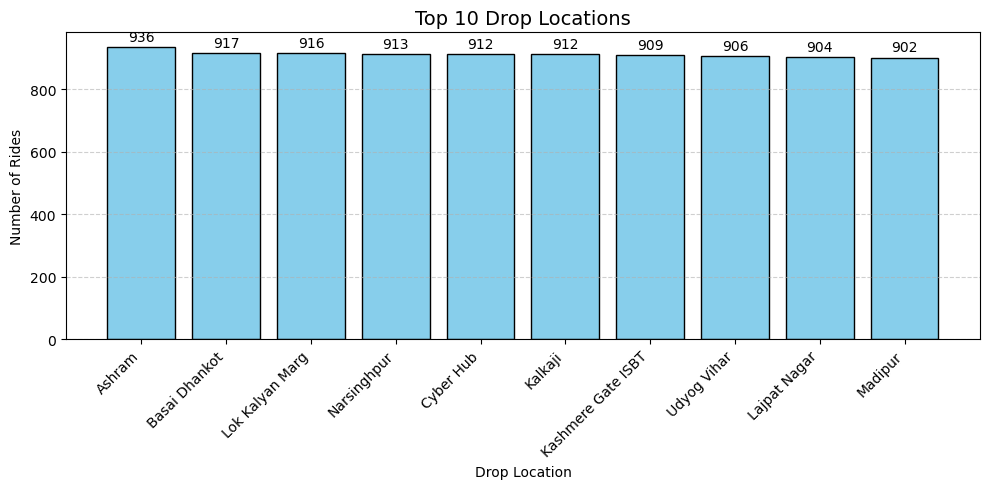

In [18]:
import matplotlib.pyplot as plt

drop_counts = df["Drop Location"].value_counts().head(10)
plt.figure(figsize=(10,5))
bars = plt.bar(drop_counts.index, drop_counts.values, color='skyblue', edgecolor='black')
plt.title("Top 10 Drop Locations", fontsize=14)
plt.xlabel("Drop Location")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45, ha='right')

# add numeric labels for clarity
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             int(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [20]:
#time taken by driver to reach pickup loc
df["pickup_delay_ratio"] = df["Avg VTAT"] / df["Ride Distance"]

In [21]:
#time taken by from pickup location to destination
df["trip_congestion_ratio"] = df["Avg CTAT"] / df["Ride Distance"]

In [23]:
#if pickup and destination both have traffic
df["total_time_ratio"] = (df["Avg VTAT"] + df["Avg CTAT"]) / df["Ride Distance"]

ValueError: Contour levels must be increasing

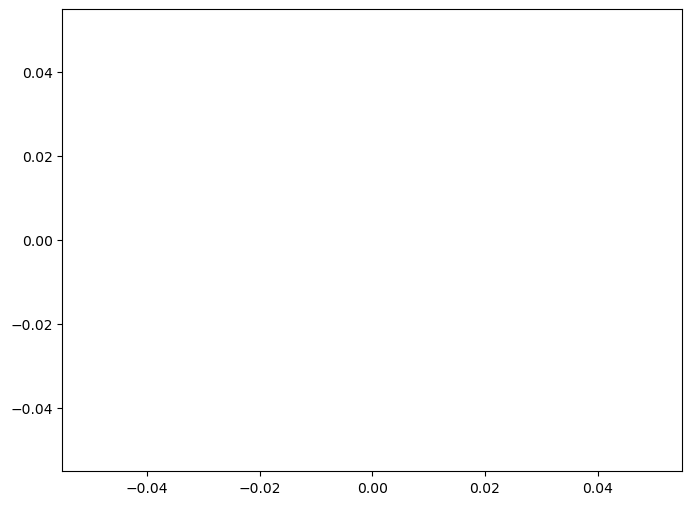

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df,
    x="pickup_delay_ratio",
    y="trip_congestion_ratio",
    fill=True,
    cmap="RdYlGn_r",
    thresh=0.05,
    levels=100
)
plt.title("Traffic Pressure Zones: Pickup vs Trip Congestion", fontsize=14)
plt.xlabel("Pickup Delay Ratio (VTAT / Distance)")
plt.ylabel("Trip Congestion Ratio (CTAT / Distance)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

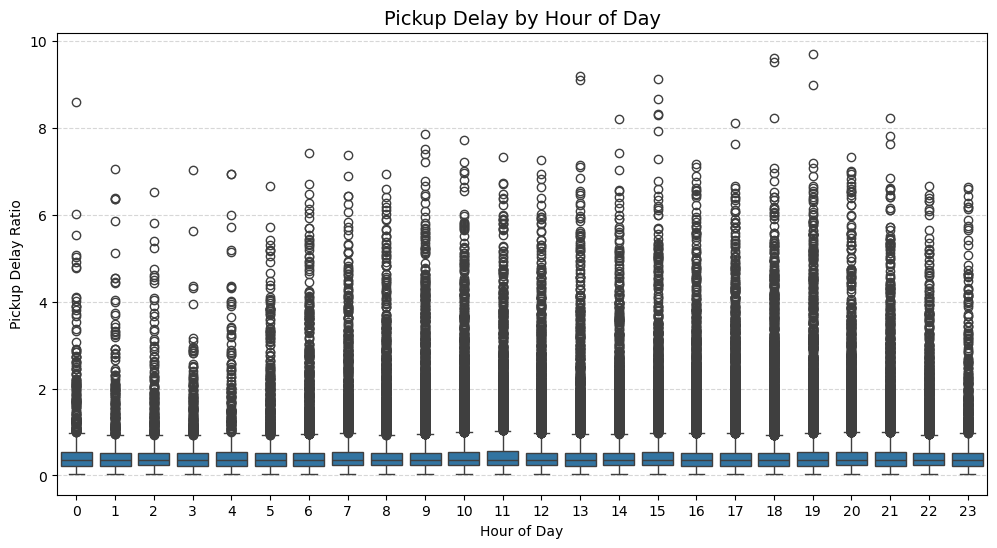

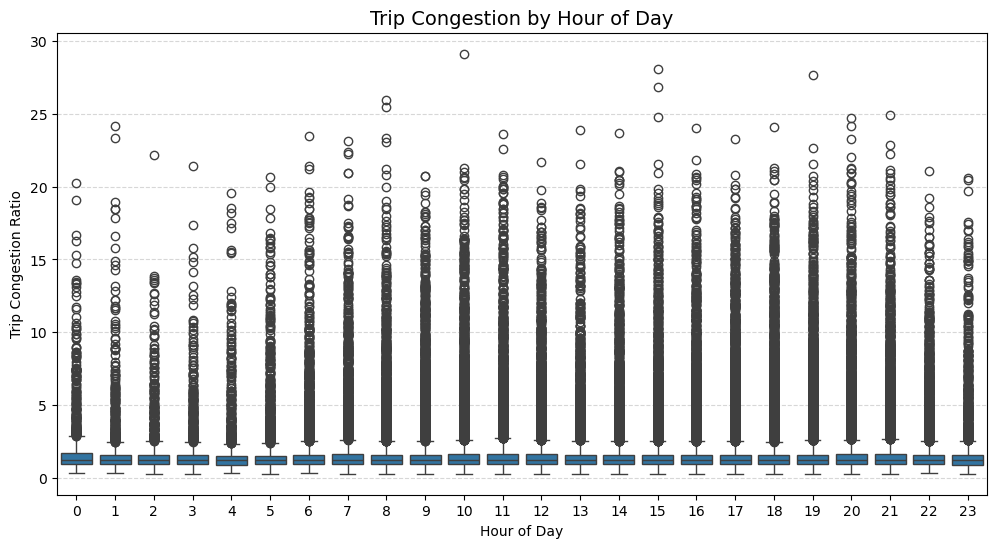

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x="hour", y="pickup_delay_ratio", data=df)
plt.title("Pickup Delay by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Pickup Delay Ratio")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="hour", y="trip_congestion_ratio", data=df)
plt.title("Trip Congestion by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Trip Congestion Ratio")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

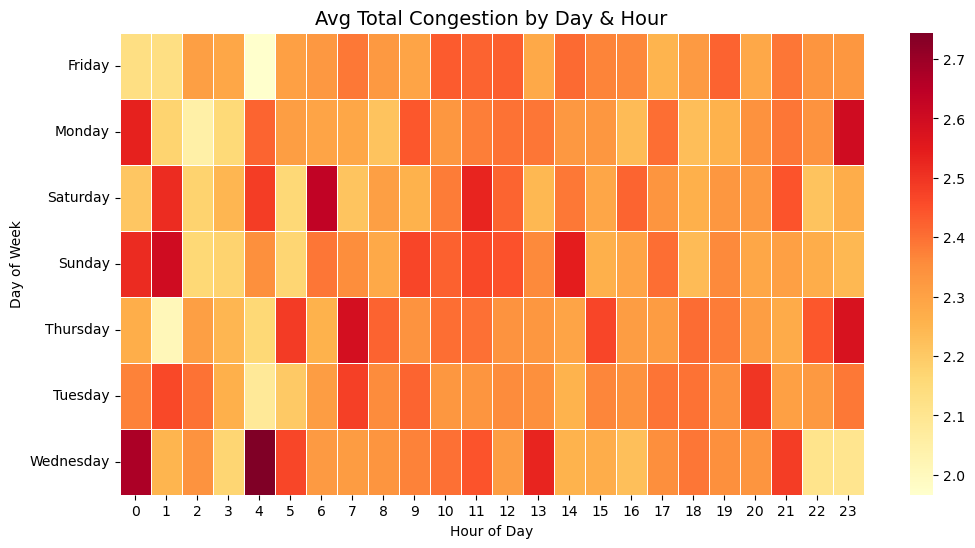

In [29]:
pivot_table = df.pivot_table(
    values="total_time_ratio",
    index="day_of_week",
    columns="hour",
    aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlOrRd", linewidths=0.5)
plt.title("Avg Total Congestion by Day & Hour", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

In [30]:
area_summary = df.groupby("Pickup Location").agg({
    "Ride Distance": "mean",
    "Avg VTAT": "mean",
    "Avg CTAT": "mean",
    "Booking Value": "mean",
    "pickup_delay_ratio": "mean",
    "trip_congestion_ratio": "mean",
    "total_time_ratio": "mean",
    "Booking Status": "count"
}).rename(columns={"Booking Status": "ride_count"}).reset_index()

In [31]:
features = ["ride_count", "pickup_delay_ratio", "trip_congestion_ratio", "total_time_ratio", "Booking Value"]

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(area_summary[features])

In [34]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"        # or however many cores you actually have
os.environ["OMP_NUM_THREADS"] = "1"

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
area_summary["cluster"] = kmeans.fit_predict(scaled)

C:\Users\avant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
area_summary["cluster"].value_counts()

cluster
1    50
2    47
0    44
3    35
Name: count, dtype: int64

In [37]:
cluster_summary = area_summary.groupby("cluster")[["ride_count", "pickup_delay_ratio", "trip_congestion_ratio", "total_time_ratio", "Booking Value"]].mean().round(2)
cluster_summary

,ride_count,pickup_delay_ratio,trip_congestion_ratio,total_time_ratio,Booking Value
cluster,,,,,
0,856.73,0.55,1.91,2.47,482.13
1,842.54,0.53,1.83,2.37,471.01
2,862.15,0.51,1.78,2.30,489.12
3,847.31,0.50,1.74,2.24,468.34


In [38]:
for i in range(4):
    print(f"Cluster {i}:")
    print(area_summary[area_summary["cluster"]==i]["Pickup Location"].head(10).to_list())
    print("\n")

Cluster 0:
['Ambience Mall', 'Ashok Park Main', 'Barakhamba Road', 'Connaught Place', 'Cyber Hub', 'Delhi Gate', 'Golf Course Road', 'Gwal Pahari', 'IMT Manesar', 'INA Market']


Cluster 1:
['Akshardham', 'Anand Vihar', 'Ardee City', 'Ashok Vihar', 'Azadpur', 'Bahadurgarh', 'Central Secretariat', 'Chanakyapuri', 'Chirag Delhi', 'Civil Lines Gurgaon']


Cluster 2:
['AIIMS', 'Anand Vihar ISBT', 'Arjangarh', 'Ashram', 'Badarpur', 'Badshahpur', 'Basai Dhankot', 'Bhiwadi', 'Botanical Garden', 'DLF City Court']


Cluster 3:
['Adarsh Nagar', 'Aya Nagar', 'Bhikaji Cama Place', 'Chandni Chowk', 'Chhatarpur', 'GTB Nagar', 'Ghitorni', 'Govindpuri', 'Greater Kailash', 'Green Park']




In [40]:
df["Booking Value"].describe()

count    150000.000000
mean        478.121220
std         329.339976
min          50.000000
25%         319.750000
50%         414.000000
75%         521.000000
max        4277.000000
Name: Booking Value, dtype: float64

In [41]:
threshold_price = 414

In [42]:
df["is_weekend"] = df["day_of_week"].isin(["Saturday", "Sunday"]).astype(int)
# Example: mark festival manually for now (later via external calendar)
festival_dates = ["2024-03-25", "2024-08-15", "2024-10-31", "2024-12-25"]
df["is_festival"] = df["Date"].isin(festival_dates).astype(int)

In [43]:
from sklearn.ensemble import RandomForestRegressor

features = ["pickup_delay_ratio", "trip_congestion_ratio", "hour", "is_weekend", "is_festival"]
X = df[features]
y = df["Booking Value"] - threshold_price

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [44]:
df["predicted_surge_gap"] = model.predict(X)
df["predicted_price"] = threshold_price + df["predicted_surge_gap"]

In [45]:
df.loc[df["predicted_price"] < threshold_price, "predicted_price"] = threshold_price

In [46]:
df[["Booking Value", "predicted_price"]].sample(10)

,Booking Value,predicted_price
13783,159.0,414.00
54297,237.0,414.00
2839,648.0,644.25
6402,158.0,414.00
125490,359.0,414.00
38322,168.0,414.00
46560,88.0,414.00
89540,858.0,766.68
104873,150.0,414.00
143520,523.0,579.35


In [51]:
print(df[["Booking Value", "predicted_price"]].head(10).to_string(index=False))

 Booking Value  predicted_price
         414.0           414.00
         237.0           414.00
         627.0           616.25
         416.0           428.67
         737.0           614.11
         316.0           414.00
         640.0           570.34
         136.0           414.00
         414.0           414.00
         135.0           414.00


In [55]:
df = df.merge(area_summary[["Pickup Location", "cluster"]], on="Pickup Location", how="left")

In [56]:
cluster_price = df.groupby("cluster")[["Booking Value", "predicted_price"]].mean().reset_index().round(2)

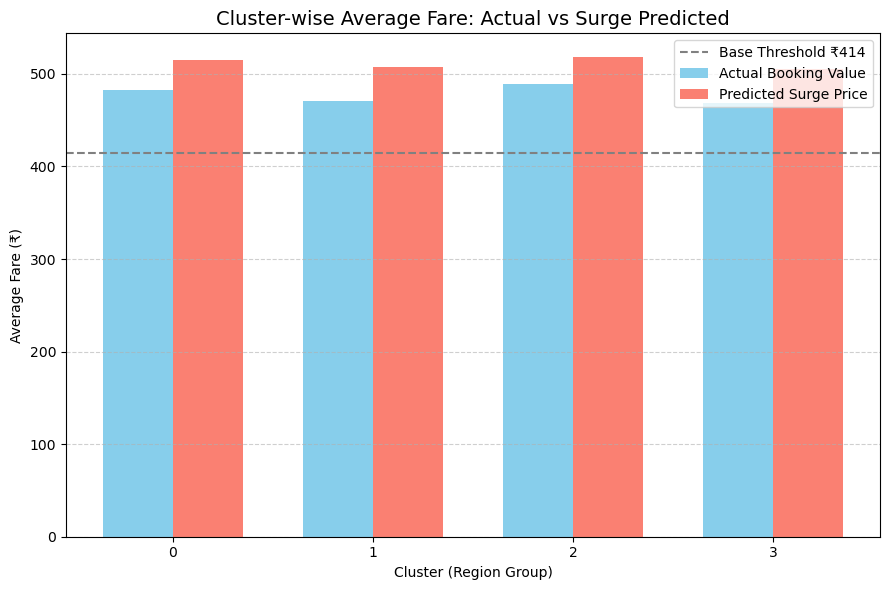

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
bar_width = 0.35
x = cluster_price["cluster"]

plt.bar(x - bar_width/2, cluster_price["Booking Value"], width=bar_width, color="skyblue", label="Actual Booking Value")
plt.bar(x + bar_width/2, cluster_price["predicted_price"], width=bar_width, color="salmon", label="Predicted Surge Price")

plt.axhline(y=414, color="gray", linestyle="--", label="Base Threshold ₹414")
plt.title("Cluster-wise Average Fare: Actual vs Surge Predicted", fontsize=14)
plt.xlabel("Cluster (Region Group)")
plt.ylabel("Average Fare (₹)")
plt.xticks(cluster_price["cluster"])
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [58]:
# show top 10 pickup locations for each cluster
for c in sorted(df["cluster"].unique()):
    top_zones = (
        df[df["cluster"] == c]["Pickup Location"]
        .value_counts()
        .head(10)
        .index.to_list()
    )
    print(f"Cluster {c} — Top Zones:")
    print(", ".join(top_zones))
    print("-" * 80)

Cluster 0 — Top Zones:
Khandsa, Barakhamba Road, Tilak Nagar, Udyog Vihar, Vishwavidyalaya, Kanhaiya Nagar, Tagore Garden, Ashok Park Main, Noida Film City, Panchsheel Park
--------------------------------------------------------------------------------
Cluster 1 — Top Zones:
Saket, Madipur, Nehru Place, Rajiv Nagar, Lok Kalyan Marg, IGI Airport, Chanakyapuri, Vaishali, Shastri Park, Rohini East
--------------------------------------------------------------------------------
Cluster 2 — Top Zones:
Badarpur, Pragati Maidan, AIIMS, Dwarka Sector 21, Pataudi Chowk, Shivaji Park, Jasola, Subhash Chowk, Inderlok, Jor Bagh
--------------------------------------------------------------------------------
Cluster 3 — Top Zones:
Mehrauli, Greater Kailash, Malviya Nagar, Nawada, Mansarovar Park, GTB Nagar, Aya Nagar, Karol Bagh, Model Town, Chandni Chowk
--------------------------------------------------------------------------------


In [59]:
# manual mapping of descriptive names based on your earlier cluster analysis
cluster_labels = {
    0: "Cluster 0 — Central Business Surge Zones",
    1: "Cluster 1 — Commuter Transition Corridors",
    2: "Cluster 2 — Premium Long-trip Areas",
    3: "Cluster 3 — Smooth Residential Routes"
}

cluster_price["cluster_name"] = cluster_price["cluster"].map(cluster_labels)

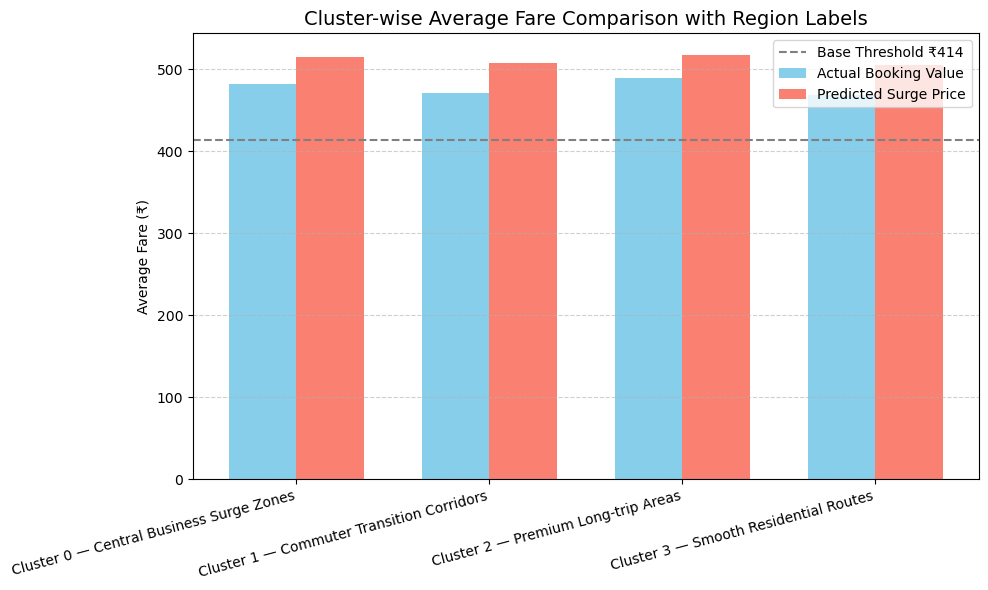

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bar_width = 0.35
x = range(len(cluster_price))

plt.bar(
    [i - bar_width/2 for i in x],
    cluster_price["Booking Value"],
    width=bar_width,
    color="skyblue",
    label="Actual Booking Value"
)
plt.bar(
    [i + bar_width/2 for i in x],
    cluster_price["predicted_price"],
    width=bar_width,
    color="salmon",
    label="Predicted Surge Price"
)

plt.axhline(y=414, color="gray", linestyle="--", label="Base Threshold ₹414")
plt.title("Cluster-wise Average Fare Comparison with Region Labels", fontsize=14)
plt.ylabel("Average Fare (₹)")
plt.xticks(x, cluster_price["cluster_name"], rotation=15, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()